## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [155]:
import pandas as pd
import numpy as np

! git clone https://www.github.com/ToriStoner/assignment3
df=pd.read_csv('./assignment3/data/car_data.csv',low_memory=False)
#1
print(df.head())
print(df.shape, '\n')
print(df.columns)



fatal: destination path 'assignment3' already exists and is not an empty directory.
   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0
(1000, 5) 

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')


In [156]:
#2
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [157]:
#2
var="Gender"
df[var].describe()

count       1000
unique         2
top       Female
freq         516
Name: Gender, dtype: object

In [158]:
#2
var="User ID"
df[var].describe()


count    1000.000000
mean      500.500000
std       288.819436
min         1.000000
25%       250.750000
50%       500.500000
75%       750.250000
max      1000.000000
Name: User ID, dtype: float64

In [159]:
#2
var="Age"
df[var].describe()

count    1000.000000
mean       40.106000
std        10.707073
min        18.000000
25%        32.000000
50%        40.000000
75%        48.000000
max        63.000000
Name: Age, dtype: float64

In [160]:
#2
var="AnnualSalary"
df[var].describe()

count      1000.000000
mean      72689.000000
std       34488.341867
min       15000.000000
25%       46375.000000
50%       72000.000000
75%       90000.000000
max      152500.000000
Name: AnnualSalary, dtype: float64

In [161]:
var="Purchased"
df[var].describe()

count    1000.000000
mean        0.402000
std         0.490547
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Purchased, dtype: float64

In [162]:
var="Gender"
df[var].value_counts() #No missing values

Female    516
Male      484
Name: Gender, dtype: int64

In [163]:
df['GenderNan'] = 0
df.loc[df['Gender']=='Female','GenderNan'] = 1
df['GenderNan'].value_counts()



1    516
0    484
Name: GenderNan, dtype: int64

In [164]:

vars = ['Age','AnnualSalary']
X = df.loc[:,vars]
y = df['Purchased']


In [165]:
#3

def maxmin(X):
  X = (X-min(X))/(max(X)-min(X))
  return(X)
X = X.apply(maxmin)
X.describe()


,Age,AnnualSalary
count,1000.000000,1000.000000
mean,0.491244,0.419556
std,0.237935,0.250824
min,0.000000,0.000000
25%,0.311111,0.228182
50%,0.488889,0.414545
75%,0.666667,0.545455
max,1.000000,1.000000


In [166]:
#4
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

[ 8 10 14]


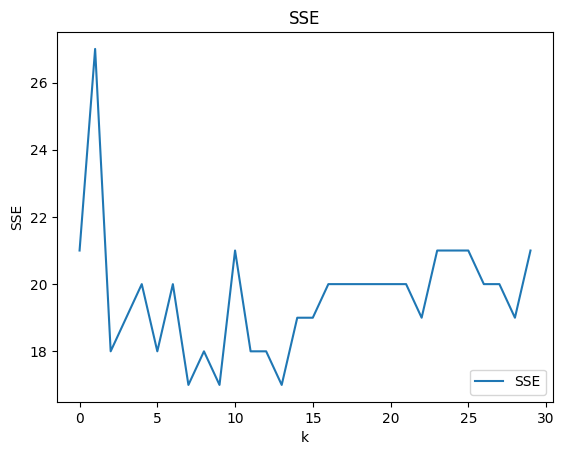

In [167]:
#5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


k_bar = 30
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)
for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1)
  fitted_model = model.fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k] = np.sum( (y_test-y_hat)**2 )
SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='SSE')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

#there are 3 optimal k values: 6,9, and 12

In [168]:
#6
model = KNeighborsClassifier(n_neighbors=6)
classifier_model = model.fit(X_train, y_train)
y_hat = classifier_model.predict(X_test)
pd.crosstab(y_test,y_hat)

#In general, more of the cases have the correct prediction.
#In total there are 18/200 cases that are not predicted correctly.
#182/200 of the cases are predicted correctly, so the overall accuracy is around 91%.

col_0,0,1
Purchased,,
0,105,14
1,4,77


In [169]:
#7

from sklearn.model_selection import train_test_split

y = df['Purchased']
X = df.loc[:,['Age','AnnualSalary','Gender']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

model = KNeighborsClassifier(n_neighbors=9)
fitted_model = model.fit(X_train.drop('Gender',axis=1),y_train)
y_hat = fitted_model.predict(X_test.drop('Gender',axis=1))

y_hat_M = y_hat[ X_test['Gender'] == 'Male']
y_hat_F = y_hat[ X_test['Gender'] == 'Female']
y_M = y_test[ X_test['Gender'] == 'Male']
y_F = y_test[ X_test['Gender'] == 'Female']



#For men 73/95 predictions are accurate, which is around 77%.
#For women 91/105 predictions are accurate, which is arround 87%
#The predictions for women are more accurate by about 10%


In [170]:
pd.crosstab(y_M,y_hat_M)


col_0,0,1
Purchased,,
0,45,7
1,15,28


In [171]:
pd.crosstab(y_F,y_hat_F)

col_0,0,1
Purchased,,
0,58,9
1,5,33


**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [172]:
import pandas as pd
import numpy as np

! git clone https://www.github.com/ToriStoner/assignment3

df=pd.read_csv('./assignment3/data/USA_cars_datasets.csv',low_memory=False)
list=["price","year","mileage"]
new_df=df.filter(list)


fatal: destination path 'assignment3' already exists and is not an empty directory.


In [173]:
new_df.tail()

,price,year,mileage
2494,7800,2019,23609
2495,9200,2018,34553
2496,9200,2018,31594
2497,9200,2018,32557
2498,9200,2018,31371


In [174]:
new_df.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [175]:
new_df.value_counts() #no missing values

price  year  mileage
50     2008  172102     2
26900  2018  42941      2
0      2003  194673     2
25     2010  149189     2
23000  2017  32788      1
                       ..
13000  2013  136661     1
       2015  59656      1
       2016  54984      1
       2017  33660      1
84900  2017  25302      1
Length: 2495, dtype: int64

In [176]:
#Q2
y = df['price']
x = df.loc[:,['year','mileage']]


In [177]:
def maxmin(x):
  x = (x-min(x))/(max(x)-min(x))
  return x

x = x.apply(maxmin)
x.describe()



,year,mileage
count,2499.000000,2499.000000
mean,0.930091,0.051377
std,0.073248,0.058654
min,0.000000,0.000000
25%,0.914894,0.021088
50%,0.957447,0.034742
75%,0.978723,0.062354
max,1.000000,1.000000


In [178]:
#Q3

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=100)



In [179]:
print(x_train)
print(y_train)

          year   mileage
2460  0.957447  0.036792
1707  0.936170  0.098162
54    0.978723  0.041897
1735  0.978723  0.048386
2188  0.978723  0.028750
...        ...       ...
350   0.978723  0.020482
1930  0.957447  0.003947
79    0.978723  0.041056
1859  0.978723  0.021625
1544  0.978723  0.016332

[1999 rows x 2 columns]
2460    16500
1707    26000
54      19600
1735    13600
2188    13800
        ...  
350      2800
1930    24190
79      18300
1859    49000
1544    29500
Name: price, Length: 1999, dtype: int64


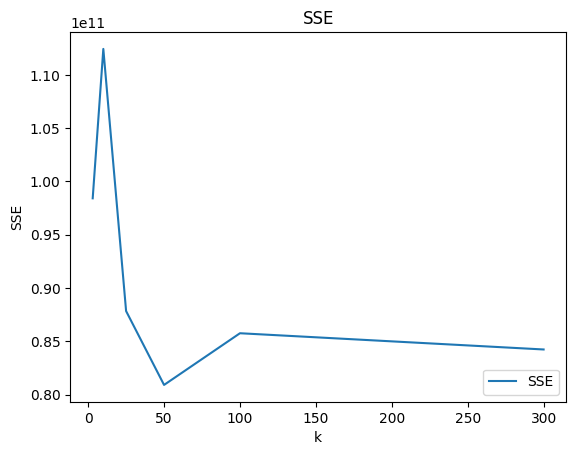

In [180]:
#Q4

from sklearn.neighbors import KNeighborsRegressor as kNNRegression
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier


k_bar = [3,10,25,50,100,300]
SSE = []
test_values = []
predicted_values = []
for k in k_bar:
    model = KNeighborsClassifier(n_neighbors=k+1)
    fitted_model = model.fit(x_train,y_train)
    y_hat = fitted_model.predict(x_test)
    squared_sum = np.sum( (y_test-y_hat)**2 )
    SSE.append(squared_sum) #used chatgpt for this line of code
    test_values.append(y_test) #used chatgpt for this line of code
    predicted_values.append(y_hat)#used chatgpt for this line of code



SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]

plt.plot(k_bar,SSE,label='SSE')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

#optimal k is 50



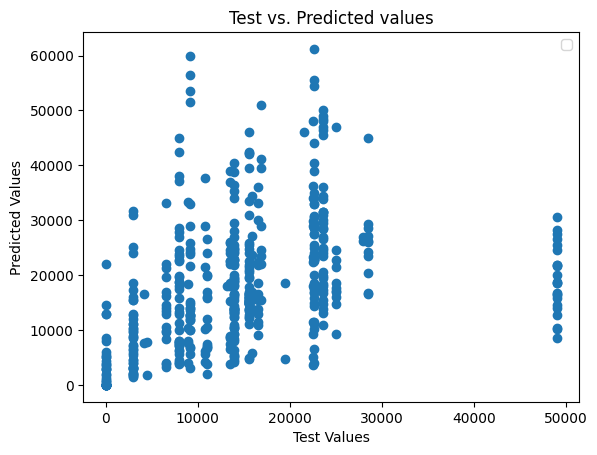

In [181]:


y_hat = fitted_model.predict(x_test)

plt.scatter(y_hat, y_test)

plt.xlabel("Test Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title('Test vs. Predicted values')
plt.show()

#The SSE declines with k values from 15-50, with the optimal k value being at 50
#the SSE then increases from k values of 50-100 before decreasing again slightly
#In the scatter plot there are a lot of points bunching vertically
#For many of the test values from 8000-22000 there is a lot of bunching of predicted values for specific test values

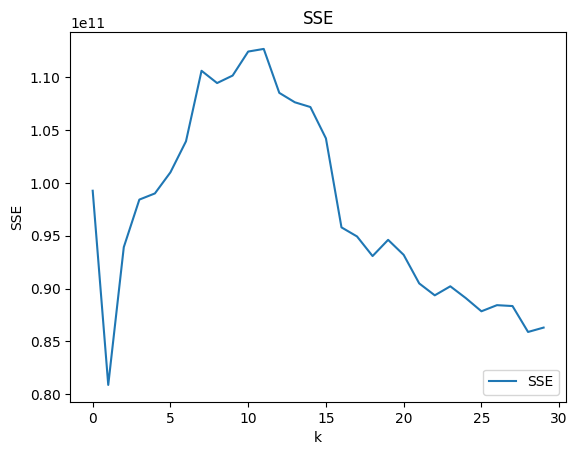

In [182]:
#Q5
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

k_bar = 30
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1)
    fitted_model = model.fit(x_train,y_train)
    y_hat = fitted_model.predict(x_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )


SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]


plt.plot(np.arange(0,k_bar),SSE,label='SSE')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

#optimal k is 2


In [183]:
#6
#The predicted values/graph was underfitting the actual values/graph
#The model was too simple to explain the actual relationship between the two variables.

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

In [184]:
import pandas as pd
import numpy as np
import seaborn as sns

df=pd.read_csv('./assignment3/data/heart_failure_clinical_records_dataset.csv',low_memory=False)


In [185]:
list="time"
new_df = df.drop( list, axis=1 )
print(new_df)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [186]:
new_df.value_counts()

age   anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  smoking  DEATH_EVENT
40.0  0        90                        0         35                 0                    255000.0   1.1               136           1    1        0              1
65.0  1        160                       1         20                 0                    327000.0   2.7               116           0    0        1              1
               128                       1         30                 1                    297000.0   1.6               136           0    0        1              1
               113                       1         60                 1                    203000.0   0.9               140           0    0        0              1
               68                        1         60                 1                    304000.0   0.8               140           1    0        0              1
               

In [187]:
#Q2
df.corr()
#The two variables that correlate most with DEATH_EVENT are time and serum_creatinine


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [188]:
#Q3


group = df.groupby(['anaemia', 'diabetes', 'high_blood_pressure', 'sex','smoking'])
variable = 'DEATH_EVENT'
table = group[variable].describe()
table = table.reset_index()

print(table)

#used chatgpt to edit 3rd and 4th lines of code
#for the variables anaemia,diabetes, high_blood_pressure, sex and smoking (so all of the evaluated variables) the proportion of the population that dies is higher if they have a value of 1

    anaemia  diabetes  high_blood_pressure  sex  smoking  count      mean  \
0         0         0                    0    0        0   15.0  0.333333   
1         0         0                    0    1        0   20.0  0.400000   
2         0         0                    0    1        1   32.0  0.187500   
3         0         0                    1    0        0   10.0  0.200000   
4         0         0                    1    0        1    1.0  0.000000   
5         0         0                    1    1        0   12.0  0.333333   
6         0         0                    1    1        1    8.0  0.375000   
7         0         1                    0    0        0   17.0  0.176471   
8         0         1                    0    1        0   17.0  0.235294   
9         0         1                    0    1        1   12.0  0.333333   
10        0         1                    1    0        0    9.0  0.333333   
11        0         1                    1    0        1    1.0  1.000000   

In [189]:
#Q4
vars = ['serum_creatinine','time']
X = df.loc[:,vars]
y = df['DEATH_EVENT']
X.head()
X.describe()

,serum_creatinine,time
count,299.00000,299.000000
mean,1.39388,130.260870
std,1.03451,77.614208
min,0.50000,4.000000
25%,0.90000,73.000000
50%,1.10000,115.000000
75%,1.40000,203.000000
max,9.40000,285.000000


In [190]:
#Q5
vars = ['serum_creatinine','time']
X = df.loc[:,vars]
y = df['DEATH_EVENT']
def maxmin(x):
  x = (x-min(x))/(max(x)-min(x))
  return x
X = X.apply(maxmin)
X.describe()

,serum_creatinine,time
count,299.000000,299.000000
mean,0.100436,0.449327
std,0.116237,0.276207
min,0.000000,0.000000
25%,0.044944,0.245552
50%,0.067416,0.395018
75%,0.101124,0.708185
max,1.000000,1.000000


In [191]:
#Q6
from sklearn.model_selection import train_test_split

y = df['DEATH_EVENT']
X = df.loc[:,['serum_creatinine','time']]
X = X.apply(maxmin)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)


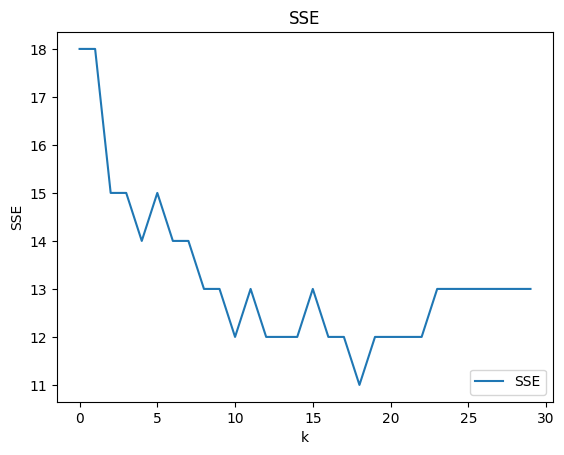

In [192]:
#Q7
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

k_bar = 30
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )


SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]

plt.plot(np.arange(0,k_bar),SSE,label='SSE')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

#the optimal k is 18

In [193]:
#8
new_df = df.drop("time", axis=1)
X = new_df.loc[:,]
y = new_df['DEATH_EVENT']
def maxmin(x):
  x = (x-min(x))/(max(x)-min(x))
  return x
X = X.apply(maxmin)
X.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.00000
mean,0.378798,0.431438,0.071299,0.418060,0.364903,0.351171,0.288833,0.100436,0.675012,0.648829,0.32107,0.32107
std,0.216269,0.496107,0.123793,0.494067,0.179316,0.478136,0.118565,0.116237,0.126071,0.478136,0.46767,0.46767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,0.200000,0.000000,0.011929,0.000000,0.242424,0.000000,0.227179,0.044944,0.600000,0.000000,0.00000,0.00000
50%,0.363636,0.000000,0.028961,0.000000,0.363636,0.000000,0.287186,0.067416,0.685714,1.000000,0.00000,0.00000
75%,0.545455,1.000000,0.071319,1.000000,0.469697,1.000000,0.337495,0.101124,0.771429,1.000000,1.00000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


In [194]:
#8

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)


In [195]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(239, 12) (60, 12) (239,) (60,)


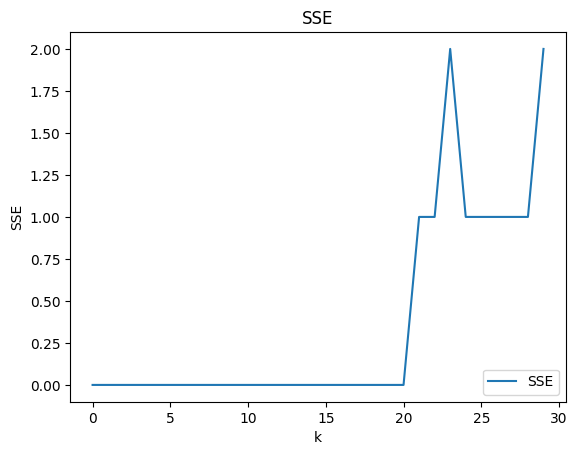

Optimal k: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
SSE values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 2.
 1. 1. 1. 1. 1. 2.]
k_grid values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]


In [196]:
#8
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k + 1)
    fitted_model = model.fit(X_train, y_train)
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum((y_test - y_hat) ** 2)

SSE_min = np.min(SSE)
min_index = np.where(SSE == SSE_min)
k_star = k_grid[min_index]

plt.plot(np.arange(0, k_bar), SSE, label='SSE')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

print("Optimal k:", k_star)
print("SSE values:", SSE)
print("k_grid values:", k_grid)

#the first model is better because it focuses on the relationship between Death_Event and two specific variables instead of all of the variables
#the first model is better able to compare the data and draw conclusions with more specific data about the variables


**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?